In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [2]:
#Reading data

import pandas as pd

df = pd.read_csv('data/ad_click_dataset.csv')
print(df)

        id full_name   age      gender device_type ad_position  \
0      670   User670  22.0         NaN     Desktop         Top   
1     3044  User3044   NaN        Male     Desktop         Top   
2     5912  User5912  41.0  Non-Binary         NaN        Side   
3     5418  User5418  34.0        Male         NaN         NaN   
4     9452  User9452  39.0  Non-Binary         NaN         NaN   
...    ...       ...   ...         ...         ...         ...   
9995  8510  User8510   NaN         NaN      Mobile         Top   
9996  7843  User7843   NaN      Female     Desktop      Bottom   
9997  3914  User3914   NaN        Male      Mobile        Side   
9998  7924  User7924   NaN         NaN     Desktop         NaN   
9999  3056  User3056  44.0        Male      Tablet         Top   

     browsing_history time_of_day  click  
0            Shopping   Afternoon      1  
1                 NaN         NaN      1  
2           Education       Night      1  
3       Entertainment     Evening  

In [3]:
print(f'We have total {len(df)} rows and {len(df.columns)} columns in the dataframe.')

We have total 10000 rows and 9 columns in the dataframe.


In [4]:
print(df.columns)

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')


In [5]:
for column in df.columns:
    print(f"{column}, {df[column].dtype}")

id, int64
full_name, object
age, float64
gender, object
device_type, object
ad_position, object
browsing_history, object
time_of_day, object
click, int64


In [6]:
print(df['click'].describe())
#My target variable click is categorical. 

count    10000.000000
mean         0.650000
std          0.476993
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: click, dtype: float64


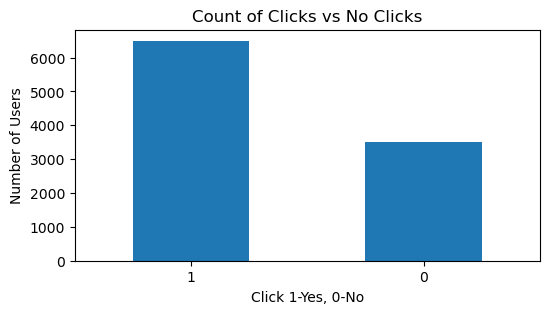

This graph shows how many users clicked on the ad. (1-Yes clicked, 0-No)


In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
df['click'].value_counts().plot.bar()
plt.xlabel('Click 1-Yes, 0-No')
plt.ylabel('Number of Users')
plt.title('Count of Clicks vs No Clicks')
plt.xticks(rotation=0)
plt.savefig('1.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows how many users clicked on the ad. (1-Yes clicked, 0-No)')


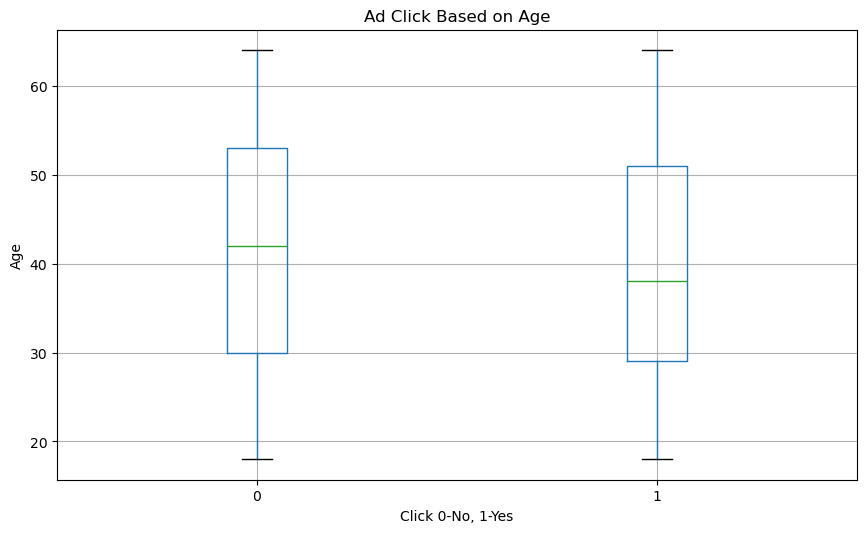

This graph shows how many users clicked on the ad based on their age. (1-Yes clicked, 0-No)


In [8]:
#Continous vs Categorical - Age vs Click(Target Variable) Boxplot

df[['age','click']].boxplot(by='click',figsize=(10,6))
plt.xlabel('Click 0-No, 1-Yes')
plt.ylabel('Age')
plt.title('Ad Click Based on Age') 
plt.suptitle('')
plt.savefig('2.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows how many users clicked on the ad based on their age. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

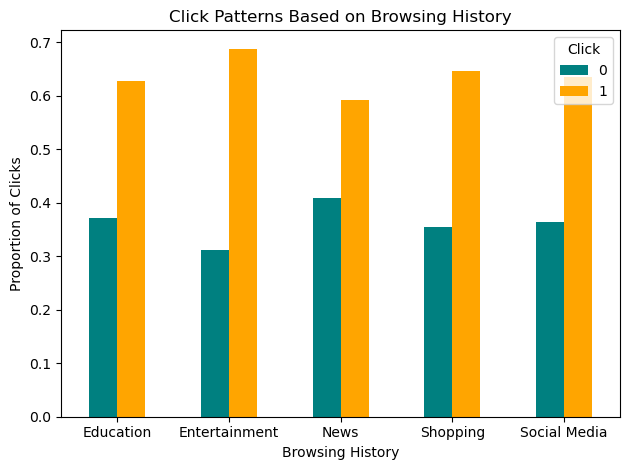

This graph shows proportion of ad clicks based on users browsing history. (1-Yes clicked, 0-No)


In [9]:
#Categorical vs Categorical - Browsing History vs Click(Target Variable) Grouped Bar Plot

plot = pd.crosstab(df['browsing_history'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
plot.plot(kind='bar', color=['Teal', 'orange'])
plt.title('Click Patterns Based on Browsing History')
plt.xlabel('Browsing History')
plt.ylabel('Proportion of Clicks')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.savefig('3.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows proportion of ad clicks based on users browsing history. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

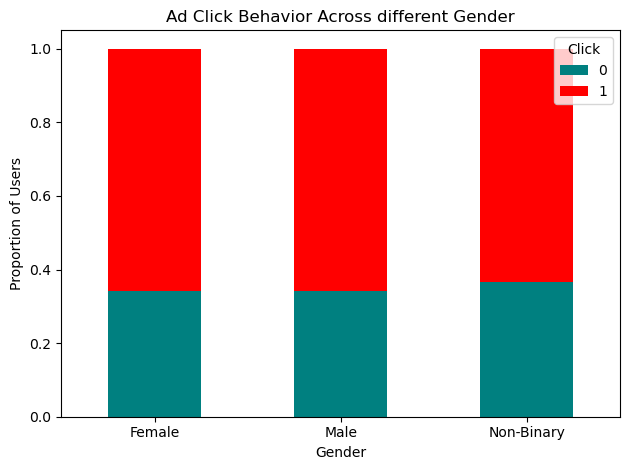

This graph shows proportion of ad clicks based on users gender. (1-Yes clicked, 0-No)


In [10]:
#Categorical vs Categorical - Gender vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['gender'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Teal', 'Red'])
plt.title('Ad Click Behavior Across different Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.savefig('4.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows proportion of ad clicks based on users gender. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

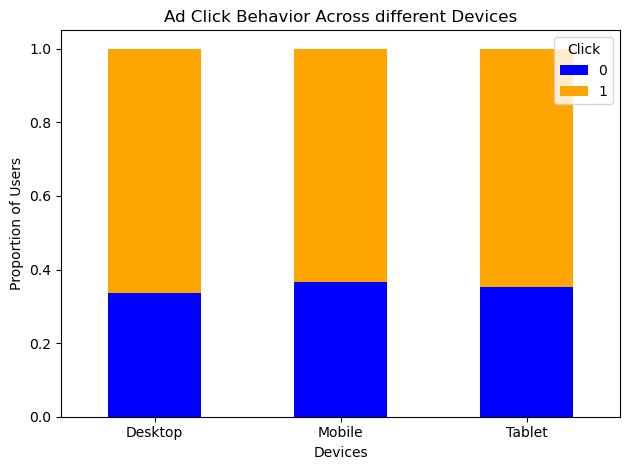

This graph shows proportion of ad clicks based on users device type. (1-Yes clicked, 0-No)


In [11]:
#Categorical vs Categorical - Device Type vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['device_type'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Blue', 'Orange'])
plt.title('Ad Click Behavior Across different Devices')
plt.xlabel('Devices')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.savefig('5.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows proportion of ad clicks based on users device type. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

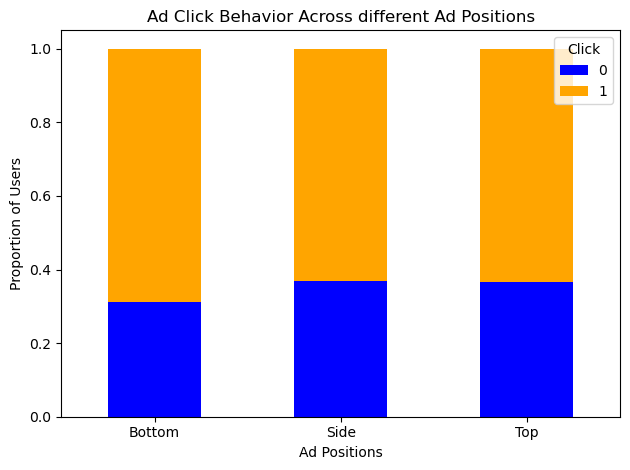

This graph shows proportion of ad clicks based on position of ads. (1-Yes clicked, 0-No)


In [12]:
#Categorical vs Categorical - Ad Position vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['ad_position'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Blue', 'Orange'])
plt.title('Ad Click Behavior Across different Ad Positions')
plt.xlabel('Ad Positions')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.savefig('6.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows proportion of ad clicks based on position of ads. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

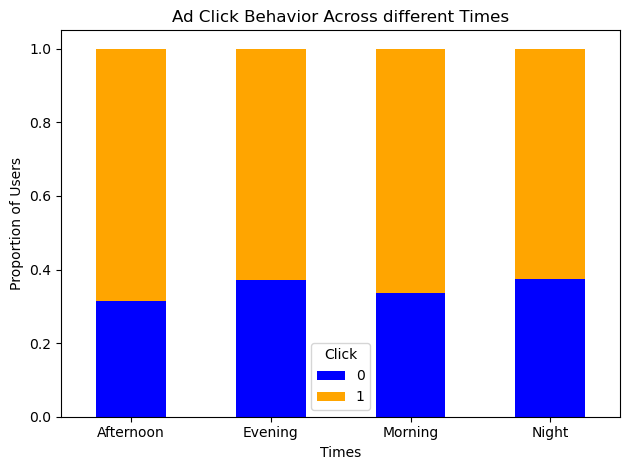

This graph shows proportion of ad clicks based on different time of the day. (1-Yes clicked, 0-No)


In [13]:
#Categorical vs Categorical - Time of the Day vs Click(Target Variable) Stacked Bar Plot

browsing_click_data = pd.crosstab(df['time_of_day'], df['click'], normalize='index')

plt.figure(figsize=(10, 5))
browsing_click_data.plot(kind='bar', stacked=True, color=['Blue', 'Orange'])
plt.title('Ad Click Behavior Across different Times')
plt.xlabel('Times')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.legend(title='Click')
plt.tight_layout()
plt.savefig('7.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows proportion of ad clicks based on different time of the day. (1-Yes clicked, 0-No)')

<Figure size 1000x500 with 0 Axes>

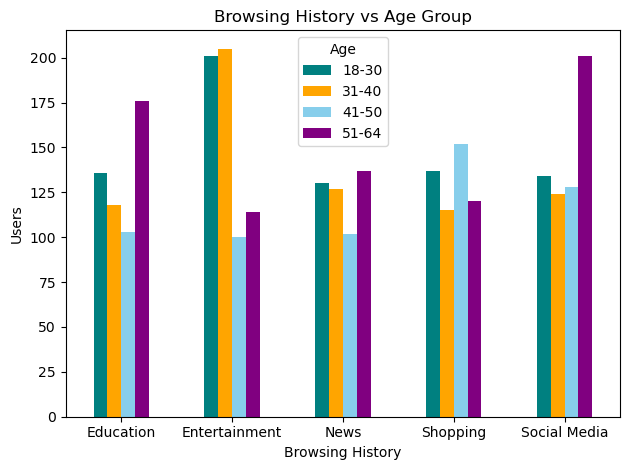

This graph shows browsing history of users based on their age.


In [14]:
#Categorical vs Categorical - Age vs Browsing History

age_bins = [18, 30, 40, 50, 64]
age_labels = ['18-30', '31-40', '41-50', '51-64']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
plot = pd.crosstab(df['browsing_history'], df['age_group'])

plt.figure(figsize=(10, 5))
plot.plot(kind='bar', color=['Teal', 'orange', 'skyblue', 'purple'])
plt.title('Browsing History vs Age Group')
plt.xlabel('Browsing History')
plt.ylabel('Users')
plt.xticks(rotation=0)
plt.legend(title='Age')
plt.tight_layout()
plt.savefig('8.png', bbox_inches='tight', dpi=300)
plt.show()
print('This graph shows browsing history of users based on their age.')

In [15]:
df = df.drop(columns=['age_group'])

In [16]:
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [17]:
print(df.dtypes)

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object


In [18]:
print(df.isnull().sum())

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


In [19]:
#missing values in print statements

frac_missing_points = df.isnull().any(axis=1).mean()
print(f'Fraction of points with missing values: {frac_missing_points * 100:.2f}%')

frac_features_with_missing = (df.isnull().sum() > 0).mean()
print(f'Fraction of features with missing values: {frac_features_with_missing * 100:.2f}%')

print()

missing_values_fractions = df.isnull().sum() / len(df)
missing_values_fractions = missing_values_fractions[missing_values_fractions > 0]

print('Features with missing values and their respective fractions:')
for feature, missing_fraction in missing_values_fractions.items():
    print(f'Feature: {feature}, Missing Values: {missing_fraction * 100:.2f}%')


Fraction of points with missing values: 91.84%
Fraction of features with missing values: 66.67%

Features with missing values and their respective fractions:
Feature: age, Missing Values: 47.66%
Feature: gender, Missing Values: 46.93%
Feature: device_type, Missing Values: 20.00%
Feature: ad_position, Missing Values: 20.00%
Feature: browsing_history, Missing Values: 47.82%
Feature: time_of_day, Missing Values: 20.00%


In [20]:
from sklearn.model_selection import GroupShuffleSplit, StratifiedGroupKFold

X = df.drop(columns=['click', 'id', 'full_name']) #Dropping full name, as it adds no value
y = df['click']  #Target variable
groups = df['id'] 

def group_split_with_stratifiedGroupkfold(X, y, groups, train_size, test_size, n_splits, random_state):
    if train_size + test_size != 1:
        raise ValueError('The sum of the train_size and test_size should be 1.')
    
    #Using GroupShuffleSplit to split into train+validation and test set
    splitter = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    
    for i_train_val, i_test in splitter.split(X, y, groups):
        X_train_val, y_train_val, groups_train_val = X.iloc[i_train_val], y.iloc[i_train_val], groups.iloc[i_train_val]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
    
    print('Test set size:', X_test.shape, y_test.shape)
    print()
    
    #Using Stratified GroupKFold to split the train+validation set into train and validation sets
    skf = StratifiedGroupKFold(n_splits=n_splits)
    for i_train, i_val in skf.split(X_train_val, y_train_val, groups_train_val):
        X_train, y_train, groups_train = X_train_val.iloc[i_train], y_train_val.iloc[i_train], groups_train_val.iloc[i_train]
        X_val, y_val, groups_val = X_train_val.iloc[i_val], y_train_val.iloc[i_val], groups_train_val.iloc[i_val]
    
        print('Training set size:', X_train.shape, y_train.shape) 
        print('Validation set size:', X_val.shape, y_val.shape)
        

    return X_train, y_train, X_val, y_val, X_test, y_test

random_state = 42
n_splits = 5  #Number of folds for GroupKFold
X_train, y_train, X_val, y_val, X_test, y_test = group_split_with_stratifiedGroupkfold(X, y, groups, train_size=0.8, test_size=0.2, n_splits=n_splits, random_state=random_state)

#print(X_train.head())
#print(X_val.head())
#print(X_test.head())

Test set size: (2019, 6) (2019,)

Training set size: (6385, 6) (6385,)
Validation set size: (1596, 6) (1596,)
Training set size: (6383, 6) (6383,)
Validation set size: (1598, 6) (1598,)
Training set size: (6384, 6) (6384,)
Validation set size: (1597, 6) (1597,)
Training set size: (6386, 6) (6386,)
Validation set size: (1595, 6) (1595,)
Training set size: (6386, 6) (6386,)
Validation set size: (1595, 6) (1595,)


In [21]:
#xgboost

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

cat_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
num_ftrs = ['age']

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
#print(X_train_prep)

print(X_val.shape)
print(X_val_prep.shape)
#print(X_val_prep)

print(X_test.shape)
print(X_test.shape)
#print(X_test_prep)

(6386, 6)
(6386, 24)
(1595, 6)
(1595, 24)
(2019, 6)
(2019, 6)


In [23]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, classification_report

param_grid = {
    "learning_rate": 0.03,
    "n_estimators": 10000,
    "seed": 42,
    "missing": np.nan,  
    "colsample_bytree": 0.9,
    "subsample": 0.66
}

XGB = xgb.XGBClassifier(**param_grid, early_stopping_rounds=50, eval_metric="logloss")

XGB.fit(X_train_prep, y_train, eval_set=[(X_val_prep, y_val)], verbose=False)

y_val_pred = XGB.predict(X_val_prep)
y_test_pred = XGB.predict(X_test_prep)

#Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, zero_division=0)
val_recall = recall_score(y_val, y_val_pred, zero_division=0)
val_f1 = f1_score(y_val, y_val_pred, zero_division=0)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, zero_division=0)
test_recall = recall_score(y_test, y_test_pred, zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\nValidation Metrics:")
print(f"{'Metric':<12}{'Value':>12}")
print(f"{'Accuracy':<12}{val_accuracy:>12.4f}")
print(f"{'Precision':<12}{val_precision:>12.4f}")
print(f"{'Recall':<12}{val_recall:>12.4f}")
print(f"{'F1-Score':<12}{val_f1:>12.4f}")
print(f"{'RMSE':<12}{val_rmse:>12.4f}")

print("\nTest Metrics:")
print(f"{'Metric':<12}{'Value':>12}")
print(f"{'Accuracy':<12}{test_accuracy:>12.4f}")
print(f"{'Precision':<12}{test_precision:>12.4f}")
print(f"{'Recall':<12}{test_recall:>12.4f}")
print(f"{'F1-Score':<12}{test_f1:>12.4f}")
print(f"{'RMSE':<12}{test_rmse:>12.4f}")


Validation Metrics:
Metric             Value
Accuracy          0.6489
Precision         0.6489
Recall            1.0000
F1-Score          0.7871
RMSE              0.5925

Test Metrics:
Metric             Value
Accuracy          0.6523
Precision         0.6523
Recall            1.0000
F1-Score          0.7896
RMSE              0.5897


In [25]:
#with random state
from sklearn.model_selection import train_test_split, ParameterGrid, KFold
import pickle

param_grid = {
    "learning_rate": [0.03],
    "n_estimators": [10000],
    "missing": [np.nan],
    "colsample_bytree": [0.9],
    "subsample": [0.6],
}
pg = ParameterGrid(param_grid)


results = {
    'test_rmse': [],
    'test_accuracy': [],
    'test_precision': [],
    'test_recall': [],
    'test_f1': []
}

random_states = [2, 7, 4, 9, 3]

for random_state in random_states:
    print(f"\nRandom State {random_state}...")

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=random_state, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=random_state, stratify=y_temp
    )

    X_train_transformed = preprocessor.fit_transform(X_train)
    X_val_transformed = preprocessor.transform(X_val)
    X_test_transformed = preprocessor.transform(X_test)

    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

    scores = []
    for params in pg:
        fold_rmse = [] 

        for train_idx, val_idx in kf.split(X_train_transformed):
            X_cv_train, X_cv_val = X_train_transformed[train_idx], X_train_transformed[val_idx]
            y_cv_train, y_cv_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            model = xgb.XGBClassifier(
                **params, random_state=random_state, eval_metric='logloss',
                n_jobs=-1, early_stopping_rounds=50
            )
            model.fit(
                X_cv_train, y_cv_train,
                eval_set=[(X_cv_val, y_cv_val)],
                verbose=False
            )

            y_cv_pred = model.predict(X_cv_val)
            rmse = np.sqrt(mean_squared_error(y_cv_val, y_cv_pred))
            fold_rmse.append(rmse)

        cv_mean_rmse = np.mean(fold_rmse)
        scores.append(cv_mean_rmse)

    best_idx = np.argmin(scores)
    best_params = list(pg)[best_idx]
    print(f"Best parameters after CV: {best_params}")


    best_model = xgb.XGBClassifier(
        **best_params, random_state=random_state, eval_metric='logloss',
        n_jobs=-1, early_stopping_rounds=50
    )
    best_model.fit(
        X_train_transformed, y_train,
        eval_set=[(X_val_transformed, y_val)],
        verbose=False
    )

    y_test_pred = best_model.predict(X_test_transformed)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_acc = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    results['test_rmse'].append(test_rmse)
    results['test_accuracy'].append(test_acc)
    results['test_precision'].append(test_precision)
    results['test_recall'].append(test_recall)
    results['test_f1'].append(test_f1)

    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")

# Summary metrics
mean_rmse = np.mean(results['test_rmse'])
std_rmse = np.std(results['test_rmse'])
mean_accuracy = np.mean(results['test_accuracy'])
std_accuracy = np.std(results['test_accuracy'])
mean_precision = np.mean(results['test_precision'])
std_precision = np.std(results['test_precision'])
mean_recall = np.mean(results['test_recall'])
std_recall = np.std(results['test_recall'])
mean_f1 = np.mean(results['test_f1'])
std_f1 = np.std(results['test_f1'])

print("\nSummary:")
print(f"Test RMSE: {mean_rmse:.4f} +/- {std_rmse:.4f}")
print(f"Test Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")
print(f"Test Precision: {mean_precision:.4f} +/- {std_precision:.4f}")
print(f"Test Recall: {mean_recall:.4f} +/- {std_recall:.4f}")
print(f"Test F1-Score: {mean_f1:.4f} +/- {std_f1:.4f}")


with open("results.pkl", "wb") as file:
    pickle.dump(results, file)

print("Results have been saved to results.pkl")


Random State 2...
Best parameters after CV: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'missing': nan, 'n_estimators': 10000, 'subsample': 0.6}
Test RMSE: 0.5292
Test Accuracy: 0.7200
Test Precision: 0.7390
Test Recall: 0.8800
Test F1-Score: 0.8034

Random State 7...
Best parameters after CV: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'missing': nan, 'n_estimators': 10000, 'subsample': 0.6}
Test RMSE: 0.5277
Test Accuracy: 0.7215
Test Precision: 0.7362
Test Recall: 0.8908
Test F1-Score: 0.8061

Random State 4...
Best parameters after CV: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'missing': nan, 'n_estimators': 10000, 'subsample': 0.6}
Test RMSE: 0.5225
Test Accuracy: 0.7270
Test Precision: 0.7359
Test Recall: 0.9046
Test F1-Score: 0.8116

Random State 9...
Best parameters after CV: {'colsample_bytree': 0.9, 'learning_rate': 0.03, 'missing': nan, 'n_estimators': 10000, 'subsample': 0.6}
Test RMSE: 0.5268
Test Accuracy: 0.7225
Test Precision: 0.7353
Test Recall: 0.895

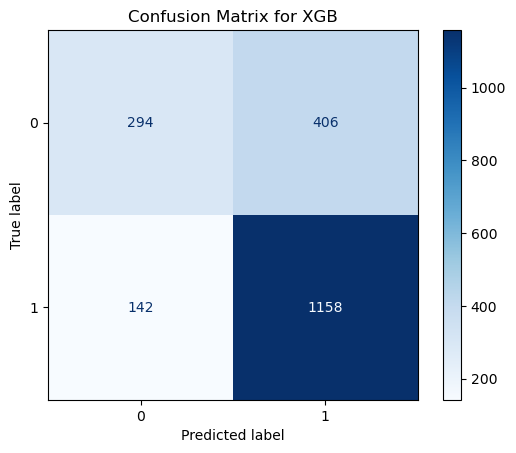

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) 
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix for XGB")
plt.savefig('9.png', bbox_inches='tight', dpi=300)
plt.show()

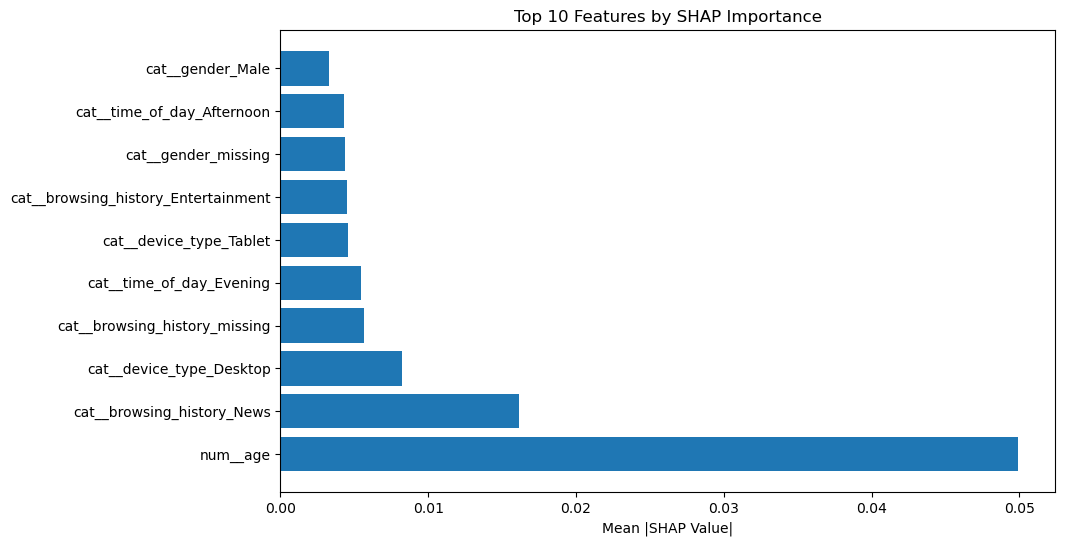

In [27]:
#Global
import shap

df_test = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

explainer = shap.TreeExplainer(XGB)  
shap_values = explainer.shap_values(df_test)  

mean_shap_values = np.abs(shap_values).mean(axis=0)

top_10_indices = np.argsort(mean_shap_values)[-10:]
top_10_features = df_test.columns[top_10_indices]
top_10_importances = mean_shap_values[top_10_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_10_features[::-1], top_10_importances[::-1]) 
plt.xlabel('Mean |SHAP Value|')
plt.title('Top 10 Features by SHAP Importance')
plt.savefig('10.png', bbox_inches='tight', dpi=300)
plt.show()

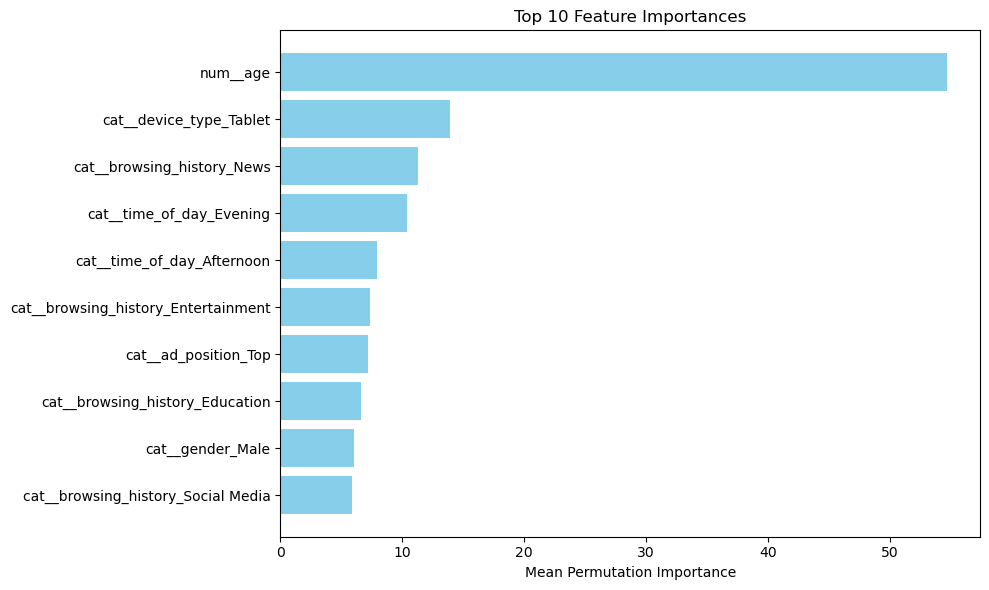

In [28]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, roc_auc_score

feature_names = np.array(df_test.columns)

perm_importance = permutation_importance(
    XGB,
    df_test,  
    y_test,          
    n_repeats=10,
    random_state=42,
    n_jobs=-1,
    scoring=make_scorer(roc_auc_score, response_method="predict_proba")
)

importances = perm_importance.importances_mean
sorted_indices = np.argsort(importances)[::-1]

top_10_indices = sorted_indices[:10]
top_10_features = feature_names[top_10_indices]
top_10_importances = importances[top_10_indices]


plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_importances[::-1] * 1000, align="center", color="skyblue")

plt.yticks(range(10), top_10_features[::-1])
plt.xlabel("Mean Permutation Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.savefig('11.png', bbox_inches='tight', dpi=300)
plt.show()

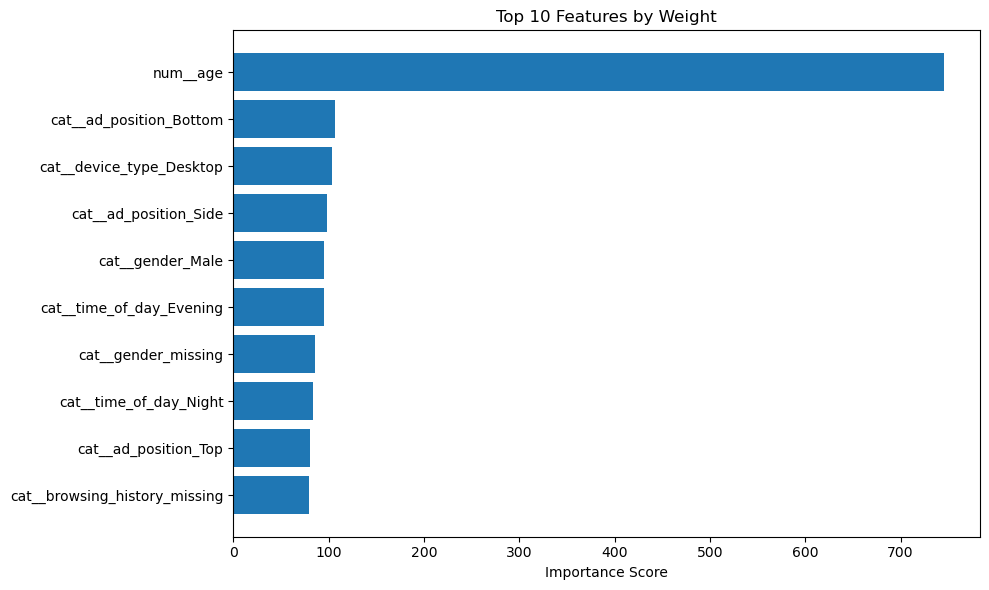

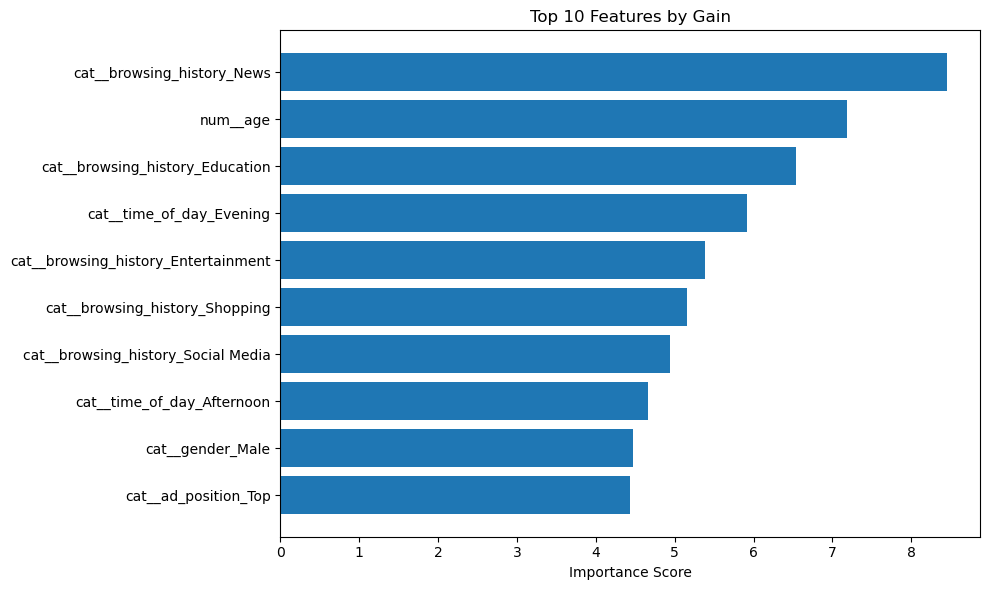

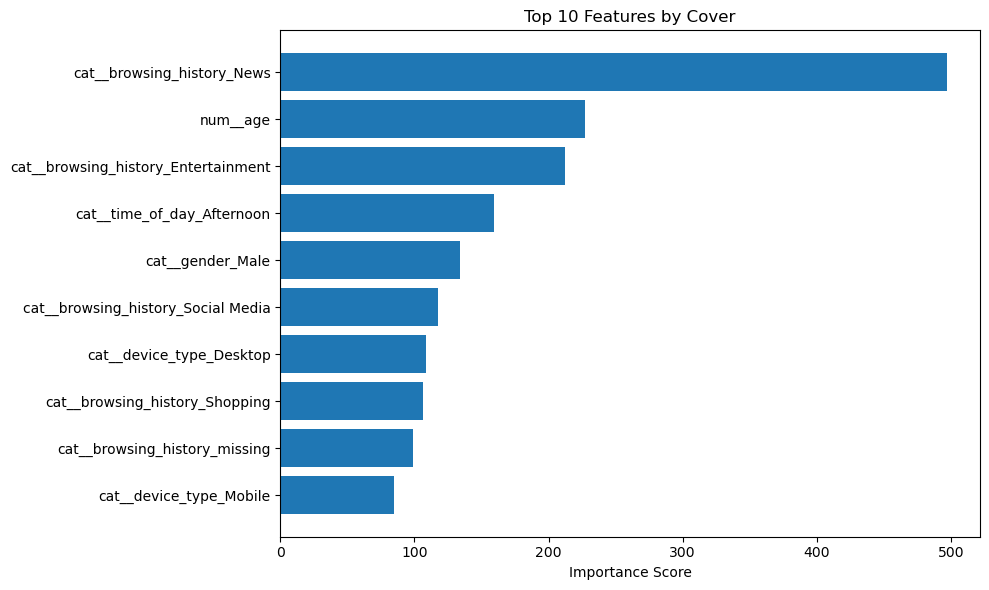

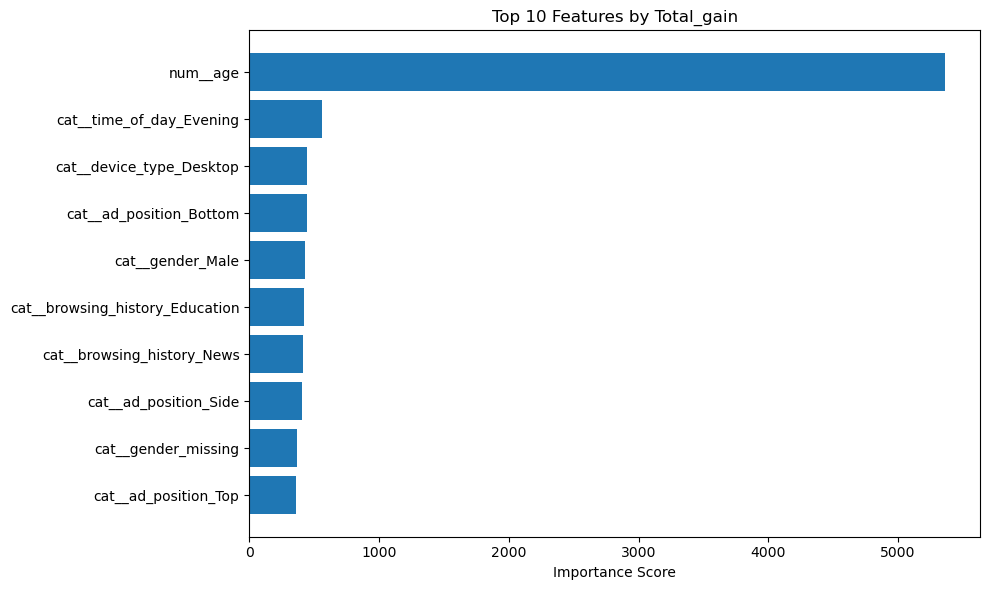

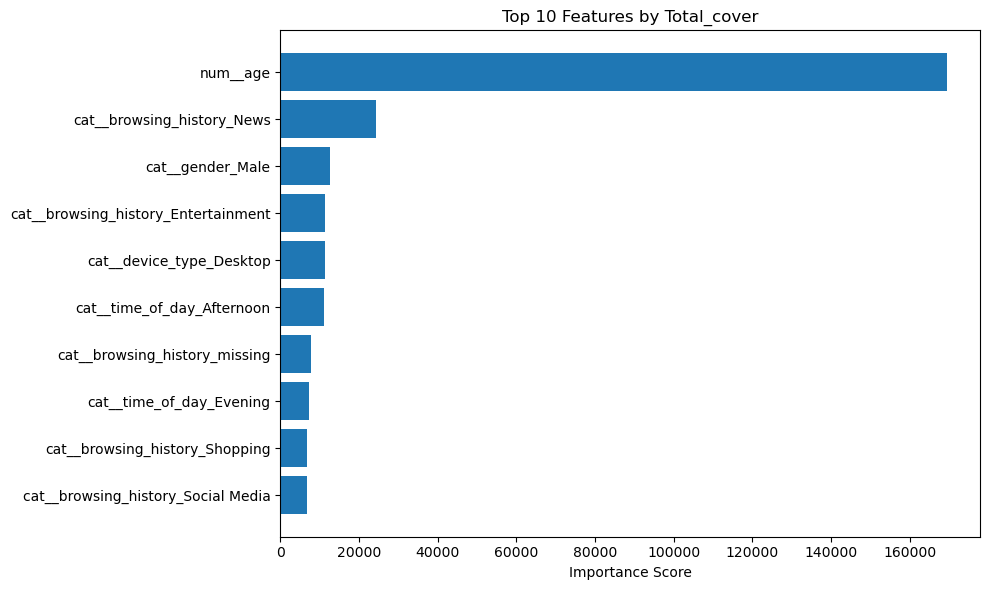

In [29]:
#xgb 5 metrics

feature_names = preprocessor.get_feature_names_out()

feature_mapping = {f"f{i}": name for i, name in enumerate(feature_names)}

importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
feature_importances = {}

for i in importance_types:
    raw_importances = XGB.get_booster().get_score(importance_type=i)
    feature_importances[i] = {feature_mapping.get(k, k): v for k, v in raw_importances.items()}

def get_sorted_importance(importance_dict):
    sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
    features, scores = zip(*sorted_importance)
    return features, scores

for i in importance_types:
    features, scores = get_sorted_importance(feature_importances[i])
    top_10_features = features[:10]
    top_10_scores = scores[:10]

    plt.figure(figsize=(10, 6))
    plt.barh(top_10_features[::-1], top_10_scores[::-1])  
    plt.xlabel('Importance Score')
    plt.title(f'Top 10 Features by {i.capitalize()}')
    plt.tight_layout()
    plt.savefig('12.png', bbox_inches='tight', dpi=300)
    plt.show()


In [30]:
#local
shap.initjs()

feature_names = preprocessor.get_feature_names_out()

explainer = shap.TreeExplainer(XGB)

index = 0  
shap_values = explainer.shap_values(df_test) 

shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    features=df_test.iloc[index],
    feature_names=feature_names 
)

In [31]:
explainer = shap.TreeExplainer(XGB)

index = 100  
shap_values = explainer.shap_values(df_test) 

shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    features=df_test.iloc[index],
    feature_names=feature_names 
)

In [32]:
explainer = shap.TreeExplainer(XGB)

index = 200  
shap_values = explainer.shap_values(df_test) 

shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    features=df_test.iloc[index],
    feature_names=feature_names 
)
#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:], show=False, matplotlib=True).savefig('scratch.png')

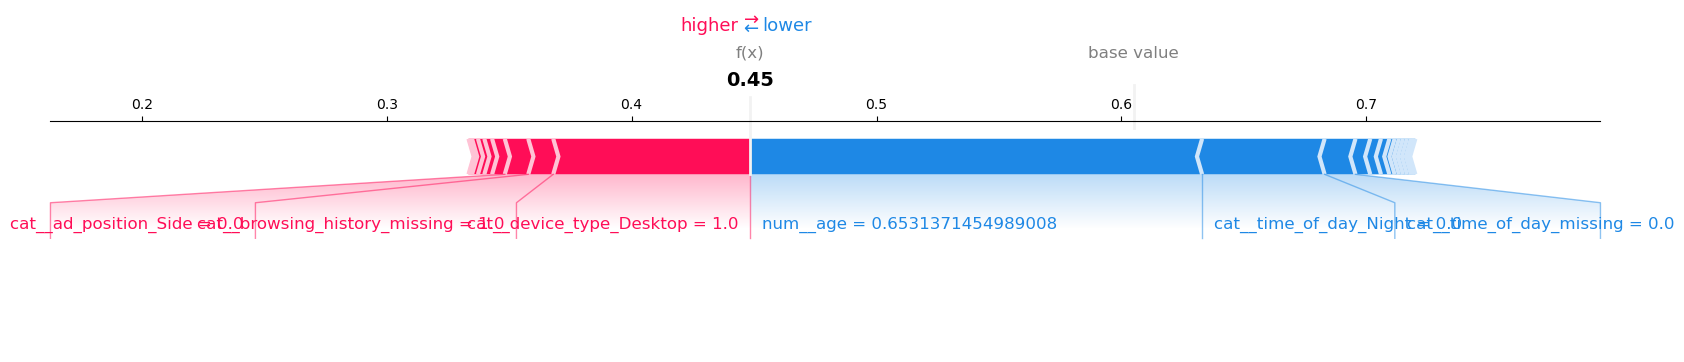

<Figure size 640x480 with 0 Axes>

In [33]:
import shap
import matplotlib.pyplot as plt

# Use matplotlib to generate the plot
shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    features=df_test.iloc[index],
    feature_names=feature_names,
    matplotlib=True
)

# Save as PNG
plt.savefig("force_plot.png", dpi=300, bbox_inches="tight")


In [34]:
# Handling missing values with reduced features and then implemnting model

In [35]:
df = pd.read_csv('data/ad_click_dataset.csv')

X = df.drop(columns=['click', 'id', 'full_name']) #Dropping full name, as it adds no value
y = df['click']  #Target variable
groups = df['id'] 

def group_split_with_stratifiedGroupkfold(X, y, groups, train_size, test_size, n_splits, random_state):
    if train_size + test_size != 1:
        raise ValueError('The sum of the train_size and test_size should be 1.')
    
    #Using GroupShuffleSplit to split into train+validation and test set
    splitter = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    
    for i_train_val, i_test in splitter.split(X, y, groups):
        X_train_val, y_train_val, groups_train_val = X.iloc[i_train_val], y.iloc[i_train_val], groups.iloc[i_train_val]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
    
    print('Test set size:', X_test.shape, y_test.shape)
    
    #Using Stratified GroupKFold to split the train+validation set into train and validation sets
    skf = StratifiedGroupKFold(n_splits=n_splits)
    for i_train, i_val in skf.split(X_train_val, y_train_val, groups_train_val):
        X_train, y_train, groups_train = X_train_val.iloc[i_train], y_train_val.iloc[i_train], groups_train_val.iloc[i_train]
        X_val, y_val, groups_val = X_train_val.iloc[i_val], y_train_val.iloc[i_val], groups_train_val.iloc[i_val]
    
        print('Training set size:', X_train.shape, y_train.shape) 
        print('Validation set size:', X_val.shape, y_val.shape)
        

    return X_train, y_train, X_val, y_val, X_test, y_test

random_state = 42
n_splits = 5  #Number of folds for GroupKFold
X_train, y_train, X_val, y_val, X_test, y_test = group_split_with_stratifiedGroupkfold(X, y, groups, train_size=0.8, test_size=0.2, n_splits=n_splits, random_state=random_state)

Test set size: (2019, 6) (2019,)
Training set size: (6385, 6) (6385,)
Validation set size: (1596, 6) (1596,)
Training set size: (6383, 6) (6383,)
Validation set size: (1598, 6) (1598,)
Training set size: (6384, 6) (6384,)
Validation set size: (1597, 6) (1597,)
Training set size: (6386, 6) (6386,)
Validation set size: (1595, 6) (1595,)
Training set size: (6386, 6) (6386,)
Validation set size: (1595, 6) (1595,)


In [36]:
import numpy as np
def preprocess_reduced_features(X_train, y_train, X_val, y_val, X_test, y_test):
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_subsets = []

    print(f'There are {len(unique_rows)} unique missing value patterns.')

    for i, pattern in enumerate(unique_rows):
        print(f'Processing pattern {i + 1}')

        sub_X_test = X_test.loc[(mask == pattern).all(axis=1), :]
        sub_y_test = y_test.loc[sub_X_test.index]

        sub_X_train = X_train.loc[:, ~pattern]
        sub_X_val = X_val.loc[:, ~pattern]
        sub_X_train = sub_X_train.dropna()
        sub_X_val = sub_X_val.dropna()

        sub_y_train = y_train.loc[sub_X_train.index]
        sub_y_val = y_val.loc[sub_X_val.index]

        # Dynamically updating preprocessor for reduced features
        cat_ftrs_dynamic = [col for col in cat_ftrs if col in sub_X_train.columns]
        num_ftrs_dynamic = [col for col in num_ftrs if col in sub_X_train.columns]

        # Skip if no features are left
        if not cat_ftrs_dynamic and not num_ftrs_dynamic:
            print(f"   Pattern {i + 1} skipped (0 features remaining).")
            continue

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, num_ftrs_dynamic),
                ('cat', categorical_transformer, cat_ftrs_dynamic)
            ]
        )

        sub_X_train_prep = preprocessor.fit_transform(sub_X_train)
        sub_X_val_prep = preprocessor.transform(sub_X_val)
        sub_X_test_prep = preprocessor.transform(sub_X_test.loc[:, ~pattern])

        # Ensuring preprocessed data has at least 1 feature
        if sub_X_train_prep.shape[1] == 0:
            print(f"   Pattern {i + 1} skipped (0 features after preprocessing).")
            continue

        all_subsets.append({
            'pattern': i + 1,
            'X_train_prep': sub_X_train_prep,
            'y_train': sub_y_train,
            'X_val_prep': sub_X_val_prep,
            'y_val': sub_y_val,
            'X_test_prep': sub_X_test_prep,
            'y_test': sub_y_test
        })

        print(f'   Pattern {i + 1}: Train size {sub_X_train_prep.shape}, Test size {sub_X_test_prep.shape}')

    return all_subsets

reduced_datasets = preprocess_reduced_features(X_train, y_train, X_val, y_val, X_test, y_test)

print(f'Total subsets created: {len(reduced_datasets)}')

There are 64 unique missing value patterns.
Processing pattern 1
   Pattern 1: Train size (517, 19), Test size (142, 19)
Processing pattern 2
   Pattern 2: Train size (628, 15), Test size (34, 15)
Processing pattern 3
   Pattern 3: Train size (909, 14), Test size (142, 14)
Processing pattern 4
   Pattern 4: Train size (1118, 10), Test size (44, 10)
Processing pattern 5
   Pattern 5: Train size (636, 16), Test size (37, 16)
Processing pattern 6
   Pattern 6: Train size (783, 12), Test size (3, 12)
Processing pattern 7
   Pattern 7: Train size (1128, 11), Test size (38, 11)
Processing pattern 8
   Pattern 8: Train size (1404, 7), Test size (11, 7)
Processing pattern 9
   Pattern 9: Train size (623, 16), Test size (32, 16)
Processing pattern 10
   Pattern 10: Train size (762, 12), Test size (7, 12)
Processing pattern 11
   Pattern 11: Train size (1110, 11), Test size (36, 11)
Processing pattern 12
   Pattern 12: Train size (1366, 7), Test size (6, 7)
Processing pattern 13
   Pattern 13: T

In [37]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def MLpipe_reduced_features(reduced_datasets, models, param_grids):
    
    overall_results = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name} across all missing patterns...")

        model_results = {'Validation RMSE': [], 'Test RMSE': [], 'Best Models': []}

        for subset in reduced_datasets:
            X_train = subset['X_train_prep']
            y_train = subset['y_train']
            X_val = subset['X_val_prep']
            y_val = subset['y_val']
            X_test = subset['X_test_prep']
            y_test = subset['y_test']

            kfold = KFold(n_splits=4, shuffle=True, random_state=42)
            grid_search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[model_name],
                scoring='neg_root_mean_squared_error',
                cv=kfold,
            )
            
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Validation evaluation
            y_val_pred = best_model.predict(X_val)
            val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
            model_results['Validation RMSE'].append(val_rmse)

            # Test evaluation
            y_test_pred = best_model.predict(X_test)
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            model_results['Test RMSE'].append(test_rmse)

            model_results['Best Models'].append(best_model)

        overall_results[model_name] = {
            'Mean Validation RMSE': np.mean(model_results['Validation RMSE']),
            'Std Validation RMSE': np.std(model_results['Validation RMSE']),
            'Mean Test RMSE': np.mean(model_results['Test RMSE']),
            'Std Test RMSE': np.std(model_results['Test RMSE']),
            'Best Models': model_results['Best Models']
        }

        print(f"{model_name} - Mean Validation RMSE: {np.mean(model_results['Validation RMSE'])}, "
              f"Std Validation RMSE: {np.std(model_results['Validation RMSE'])}")
        print(f"{model_name} - Mean Test RMSE: {np.mean(model_results['Test RMSE'])}, "
              f"Std Test RMSE: {np.std(model_results['Test RMSE'])}\n")

    return overall_results


models = {
    'Lasso': Lasso(max_iter=10000),
    'Ridge': Ridge(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000),
    #'RandomForest': RandomForestRegressor(),
    #'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}

param_grids = {
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Ridge': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    #'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]},
    #'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

# Evaluate models on reduced datasets
results = MLpipe_reduced_features(reduced_datasets, models, param_grids)

print("\nReduced Features Model Evaluation Summary:")
print(f"{'Model':<15}{'Mean Test RMSE':>18}{'Std Test RMSE':>18}")
print("-" * 51)

for model_name, result in results.items():
    mean_test_rmse = result.get('Mean Test RMSE', 'N/A')
    std_test_rmse = result.get('Std Test RMSE', 'N/A')
    print(f"{model_name:<15}{mean_test_rmse:>18.4f}{std_test_rmse:>18.4f}")

Evaluating Lasso across all missing patterns...
Lasso - Mean Validation RMSE: 0.4782839427452867, Std Validation RMSE: 0.004746583518288471
Lasso - Mean Test RMSE: 0.48871704407876565, Std Test RMSE: 0.05606235396129466

Evaluating Ridge across all missing patterns...
Ridge - Mean Validation RMSE: 0.48087451760236855, Std Validation RMSE: 0.005926634336346897
Ridge - Mean Test RMSE: 0.4917127197842628, Std Test RMSE: 0.05737191124117217

Evaluating ElasticNet across all missing patterns...
ElasticNet - Mean Validation RMSE: 0.47819452459358813, Std Validation RMSE: 0.004784748137172616
ElasticNet - Mean Test RMSE: 0.4888630491774524, Std Test RMSE: 0.05568935878326108

Evaluating KNeighbors across all missing patterns...
KNeighbors - Mean Validation RMSE: 0.604761860250243, Std Validation RMSE: 0.09255341868328804
KNeighbors - Mean Test RMSE: 0.6068667768734451, Std Test RMSE: 0.16654173416914522


Reduced Features Model Evaluation Summary:
Model              Mean Test RMSE     Std Tes

In [38]:
#with random state
def MLpipe_multiple_random_states(reduced_datasets, models, param_grids, random_states):
    overall_results = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name} across all missing patterns and random states...")

        model_results = {
            'Validation RMSE': [],
            'Test RMSE': [],
            'Accuracy': [],
            'Precision': [],
            'Recall': [],
            'F1-Score': [],
            'Best Models': []
        }

        for random_state in random_states:
            for subset in reduced_datasets:
                X_train = subset['X_train_prep']
                y_train = subset['y_train']
                X_val = subset['X_val_prep']
                y_val = subset['y_val']
                X_test = subset['X_test_prep']
                y_test = subset['y_test']

                kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grids[model_name],
                    scoring='neg_root_mean_squared_error',
                    cv=kfold,
                )
                
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_

                y_test_pred = best_model.predict(X_test)

                if np.issubdtype(y_test_pred.dtype, np.floating):
                    y_test_pred = (y_test_pred >= 0.5).astype(int)

                test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                model_results['Test RMSE'].append(test_rmse)

                accuracy = accuracy_score(y_test, y_test_pred)
                precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

                model_results['Accuracy'].append(accuracy)
                model_results['Precision'].append(precision)
                model_results['Recall'].append(recall)
                model_results['F1-Score'].append(f1)

                model_results['Best Models'].append(best_model)

        overall_results[model_name] = {
            'Mean Test RMSE': np.mean(model_results['Test RMSE']),
            'Std Test RMSE': np.std(model_results['Test RMSE']),
            'Mean Accuracy': np.mean(model_results['Accuracy']),
            'Mean Precision': np.mean(model_results['Precision']),
            'Mean Recall': np.mean(model_results['Recall']),
            'Mean F1-Score': np.mean(model_results['F1-Score']),
            'Best Models': model_results['Best Models']
        }

        print(f"{model_name} - Mean Test RMSE: {np.mean(model_results['Test RMSE']):.4f}, "
              f"Std Test RMSE: {np.std(model_results['Test RMSE']):.4f}")
        print(f"{model_name} - Mean Accuracy: {np.mean(model_results['Accuracy']):.4f}, "
              f"Mean Precision: {np.mean(model_results['Precision']):.4f}, "
              f"Mean Recall: {np.mean(model_results['Recall']):.4f}, "
              f"Mean F1-Score: {np.mean(model_results['F1-Score']):.4f}\n")

    return overall_results

models = {
    'Lasso': Lasso(max_iter=10000),
    'Ridge': Ridge(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000),
    'KNeighbors': KNeighborsRegressor()
}

param_grids = {
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Ridge': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

random_states = [2, 7, 4, 9, 3]

results = MLpipe_multiple_random_states(reduced_datasets, models, param_grids, random_states)

print("\nReduced Features Model Evaluation Summary:")
print(f"{'Model':<15}{'Mean Test RMSE':>18}{'Std Test RMSE':>18}{'Accuracy':>12}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}")
print("-" * 90)

for model_name, result in results.items():
    mean_test_rmse = result.get('Mean Test RMSE', 'N/A')
    std_test_rmse = result.get('Std Test RMSE', 'N/A')
    mean_accuracy = result.get('Mean Accuracy', 'N/A')
    mean_precision = result.get('Mean Precision', 'N/A')
    mean_recall = result.get('Mean Recall', 'N/A')
    mean_f1 = result.get('Mean F1-Score', 'N/A')

    print(f"{model_name:<15}{mean_test_rmse:>18.4f}{std_test_rmse:>18.4f}{mean_accuracy:>12.4f}"
          f"{mean_precision:>12.4f}{mean_recall:>12.4f}{mean_f1:>12.4f}")


Evaluating Lasso across all missing patterns and random states...
Lasso - Mean Test RMSE: 0.5750, Std Test RMSE: 0.2110
Lasso - Mean Accuracy: 0.6249, Mean Precision: 0.4454, Mean Recall: 0.6249, Mean F1-Score: 0.5089

Evaluating Ridge across all missing patterns and random states...
Ridge - Mean Test RMSE: 0.5830, Std Test RMSE: 0.2153
Ridge - Mean Accuracy: 0.6138, Mean Precision: 0.4657, Mean Recall: 0.6138, Mean F1-Score: 0.5096

Evaluating ElasticNet across all missing patterns and random states...
ElasticNet - Mean Test RMSE: 0.5767, Std Test RMSE: 0.2113
ElasticNet - Mean Accuracy: 0.6227, Mean Precision: 0.4447, Mean Recall: 0.6227, Mean F1-Score: 0.5077

Evaluating KNeighbors across all missing patterns and random states...
KNeighbors - Mean Test RMSE: 0.6824, Std Test RMSE: 0.2122
KNeighbors - Mean Accuracy: 0.4893, Mean Precision: 0.5517, Mean Recall: 0.4893, Mean F1-Score: 0.4752


Reduced Features Model Evaluation Summary:
Model              Mean Test RMSE     Std Test RMS

In [39]:
def MLpipe_multiple_random_states(reduced_datasets, models, param_grids, random_states):
    overall_results = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name} across all missing patterns and random states...")

        model_results = {
            'Validation RMSE': [],
            'Test RMSE': [],
            'Accuracy': [],
            'Precision': [],
            'Recall': [],
            'F1-Score': [],
            'Best Models': []
        }

        for random_state in random_states:
            for subset in reduced_datasets:
                X_train = subset['X_train_prep']
                y_train = subset['y_train']
                X_val = subset['X_val_prep']
                y_val = subset['y_val']
                X_test = subset['X_test_prep']
                y_test = subset['y_test']

                kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grids[model_name],
                    scoring='neg_root_mean_squared_error',
                    cv=kfold,
                )
                
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_

                y_test_pred = best_model.predict(X_test)

                if np.issubdtype(y_test_pred.dtype, np.floating):
                    y_test_pred = (y_test_pred >= 0.5).astype(int)

                test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                model_results['Test RMSE'].append(test_rmse)

                accuracy = accuracy_score(y_test, y_test_pred)
                precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

                model_results['Accuracy'].append(accuracy)
                model_results['Precision'].append(precision)
                model_results['Recall'].append(recall)
                model_results['F1-Score'].append(f1)

                model_results['Best Models'].append(best_model)

        overall_results[model_name] = {
            'Mean Test RMSE': np.mean(model_results['Test RMSE']),
            'Std Test RMSE': np.std(model_results['Test RMSE']),
            'Mean Accuracy': np.mean(model_results['Accuracy']),
            'Mean Precision': np.mean(model_results['Precision']),
            'Mean Recall': np.mean(model_results['Recall']),
            'Mean F1-Score': np.mean(model_results['F1-Score']),
            'Std F1-Score': np.std(model_results['F1-Score']),
            'Best Models': model_results['Best Models']
        }

        print(f"{model_name} - Mean Test RMSE: {np.mean(model_results['Test RMSE']):.4f}, "
              f"Std Test RMSE: {np.std(model_results['Test RMSE']):.4f}")
        print(f"{model_name} - Mean Accuracy: {np.mean(model_results['Accuracy']):.4f}, "
              f"Mean Precision: {np.mean(model_results['Precision']):.4f}, "
              f"Mean Recall: {np.mean(model_results['Recall']):.4f}, "
              f"Mean F1-Score: {np.mean(model_results['F1-Score']):.4f}, "
              f"Std F1-Score: {np.std(model_results['F1-Score']):.4f}\n")

    return overall_results

models = {
    'Lasso': Lasso(max_iter=10000),
    'Ridge': Ridge(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000),
    #'RandomForest': RandomForestRegressor(),
    #'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}

param_grids = {
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Ridge': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    #'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]},
    #'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

random_states = [2, 7, 4, 9, 3]

results = MLpipe_multiple_random_states(reduced_datasets, models, param_grids, random_states)

print("\nReduced Features Model Evaluation Summary:")
print(f"{'Model':<15}{'Mean Test RMSE':>18}{'Std Test RMSE':>18}{'Accuracy':>12}{'Precision':>12}{'Recall':>12}{'Mean F1':>12}{'Std F1':>12}")
print("-" * 102)

for model_name, result in results.items():
    mean_test_rmse = result.get('Mean Test RMSE', 'N/A')
    std_test_rmse = result.get('Std Test RMSE', 'N/A')
    mean_accuracy = result.get('Mean Accuracy', 'N/A')
    mean_precision = result.get('Mean Precision', 'N/A')
    mean_recall = result.get('Mean Recall', 'N/A')
    mean_f1 = result.get('Mean F1-Score', 'N/A')
    std_f1 = result.get('Std F1-Score', 'N/A')

    print(f"{model_name:<15}{mean_test_rmse:>18.4f}{std_test_rmse:>18.4f}{mean_accuracy:>12.4f}"
          f"{mean_precision:>12.4f}{mean_recall:>12.4f}{mean_f1:>12.4f}{std_f1:>12.4f}")


Evaluating Lasso across all missing patterns and random states...
Lasso - Mean Test RMSE: 0.5750, Std Test RMSE: 0.2110
Lasso - Mean Accuracy: 0.6249, Mean Precision: 0.4454, Mean Recall: 0.6249, Mean F1-Score: 0.5089, Std F1-Score: 0.2262

Evaluating Ridge across all missing patterns and random states...
Ridge - Mean Test RMSE: 0.5830, Std Test RMSE: 0.2153
Ridge - Mean Accuracy: 0.6138, Mean Precision: 0.4657, Mean Recall: 0.6138, Mean F1-Score: 0.5096, Std F1-Score: 0.2306

Evaluating ElasticNet across all missing patterns and random states...
ElasticNet - Mean Test RMSE: 0.5767, Std Test RMSE: 0.2113
ElasticNet - Mean Accuracy: 0.6227, Mean Precision: 0.4447, Mean Recall: 0.6227, Mean F1-Score: 0.5077, Std F1-Score: 0.2262

Evaluating KNeighbors across all missing patterns and random states...
KNeighbors - Mean Test RMSE: 0.6824, Std Test RMSE: 0.2122
KNeighbors - Mean Accuracy: 0.4893, Mean Precision: 0.5517, Mean Recall: 0.4893, Mean F1-Score: 0.4752, Std F1-Score: 0.2219


Reduc

In [40]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function definition
def MLpipe_multiple_random_states(reduced_datasets, models, param_grids, random_states):
    overall_results = {}

    for model_name, model in models.items():
        print(f"Evaluating {model_name} across all missing patterns and random states...")

        model_results = {
            'Validation RMSE': [],
            'Test RMSE': [],
            'Accuracy': [],
            'Precision': [],
            'Recall': [],
            'F1-Score': [],
            'Best Parameters': [],
            'Best Models': []
        }

        for random_state in random_states:
            for subset in reduced_datasets:
                X_train = subset['X_train_prep']
                y_train = subset['y_train']
                X_val = subset['X_val_prep']
                y_val = subset['y_val']
                X_test = subset['X_test_prep']
                y_test = subset['y_test']

                kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
                grid_search = GridSearchCV(
                    estimator=model,
                    param_grid=param_grids[model_name],
                    scoring='neg_root_mean_squared_error',
                    cv=kfold,
                )
                
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_  # Get the best hyperparameters
                
                y_test_pred = best_model.predict(X_test)

                if np.issubdtype(y_test_pred.dtype, np.floating):
                    y_test_pred = (y_test_pred >= 0.5).astype(int)

                test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
                model_results['Test RMSE'].append(test_rmse)

                accuracy = accuracy_score(y_test, y_test_pred)
                precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
                f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

                model_results['Accuracy'].append(accuracy)
                model_results['Precision'].append(precision)
                model_results['Recall'].append(recall)
                model_results['F1-Score'].append(f1)

                model_results['Best Models'].append(best_model)
                model_results['Best Parameters'].append(best_params)

        overall_results[model_name] = {
            'Mean Test RMSE': np.mean(model_results['Test RMSE']),
            'Std Test RMSE': np.std(model_results['Test RMSE']),
            'Mean Accuracy': np.mean(model_results['Accuracy']),
            'Mean Precision': np.mean(model_results['Precision']),
            'Mean Recall': np.mean(model_results['Recall']),
            'Mean F1-Score': np.mean(model_results['F1-Score']),
            'Best Models': model_results['Best Models'],
            'Best Parameters': model_results['Best Parameters']
        }

        print(f"{model_name} - Mean Test RMSE: {np.mean(model_results['Test RMSE']):.4f}, "
              f"Std Test RMSE: {np.std(model_results['Test RMSE']):.4f}")
        print(f"{model_name} - Mean Accuracy: {np.mean(model_results['Accuracy']):.4f}, "
              f"Mean Precision: {np.mean(model_results['Precision']):.4f}, "
              f"Mean Recall: {np.mean(model_results['Recall']):.4f}, "
              f"Mean F1-Score: {np.mean(model_results['F1-Score']):.4f}")
        print(f"Best Parameters for {model_name}: {model_results['Best Parameters']}\n")

    return overall_results

# Model and hyperparameter definitions
models = {
    'Lasso': Lasso(max_iter=10000),
    'Ridge': Ridge(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000),
    'KNeighbors': KNeighborsRegressor()
}

param_grids = {
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Ridge': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'ElasticNet': {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]},
    'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

random_states = [2, 7, 4, 9, 3]

# Run the function
results = MLpipe_multiple_random_states(reduced_datasets, models, param_grids, random_states)

# Print summary of results
print("\nReduced Features Model Evaluation Summary:")
print(f"{'Model':<15}{'Mean Test RMSE':>18}{'Std Test RMSE':>18}{'Accuracy':>12}{'Precision':>12}{'Recall':>12}{'F1-Score':>12}")
print("-" * 90)

for model_name, result in results.items():
    mean_test_rmse = result.get('Mean Test RMSE', 'N/A')
    std_test_rmse = result.get('Std Test RMSE', 'N/A')
    mean_accuracy = result.get('Mean Accuracy', 'N/A')
    mean_precision = result.get('Mean Precision', 'N/A')
    mean_recall = result.get('Mean Recall', 'N/A')
    mean_f1 = result.get('Mean F1-Score', 'N/A')
    best_parameters = result.get('Best Parameters', [])

    print(f"{model_name:<15}{mean_test_rmse:>18.4f}{std_test_rmse:>18.4f}{mean_accuracy:>12.4f}"
          f"{mean_precision:>12.4f}{mean_recall:>12.4f}{mean_f1:>12.4f}")
    print(f"Best Parameters: {best_parameters}\n")


Evaluating Lasso across all missing patterns and random states...
Lasso - Mean Test RMSE: 0.5750, Std Test RMSE: 0.2110
Lasso - Mean Accuracy: 0.6249, Mean Precision: 0.4454, Mean Recall: 0.6249, Mean F1-Score: 0.5089
Best Parameters for Lasso: [{'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.001}, {'alpha': 0.1}, {'alpha': 0.001}, {'alpha': 0.1}, {'alpha': 0.001}, {'alpha': 0.1}, {'alpha': 0.1

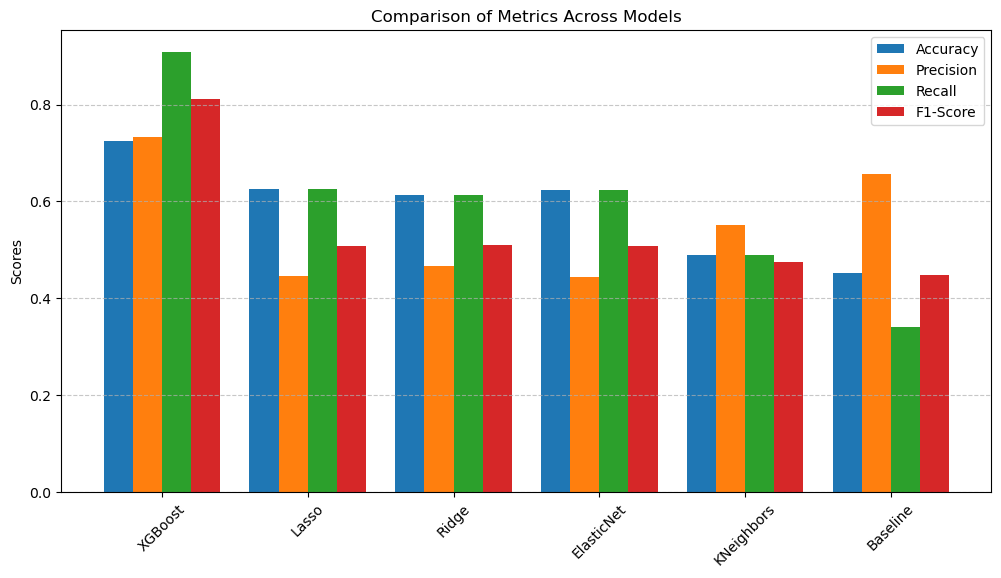

In [41]:

models = ['XGBoost', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighbors', 'Baseline']
accuracy_scores = [0.7243, 0.6249, 0.6138, 0.6227, 0.4893, 0.4525]
precision_scores = [0.7320, 0.4454, 0.4657, 0.4447, 0.5517, 0.6570]
recall_scores = [0.9085, 0.6249, 0.6138, 0.6227, 0.4893, 0.3397]
f1_scores = [0.8107, 0.5089, 0.5096, 0.5077, 0.4752, 0.4478]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]

x = np.arange(len(models)) 
width = 0.2  

plt.figure(figsize=(12, 6))
for i, (metric, score) in enumerate(zip(metrics, scores)):
    plt.bar(x + i * width, score, width, label=metric)

plt.ylabel('Scores')
plt.title('Comparison of Metrics Across Models')
plt.xticks(x + width * (len(metrics) - 1) / 2, models, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('13.png', bbox_inches='tight', dpi=300)
plt.show()

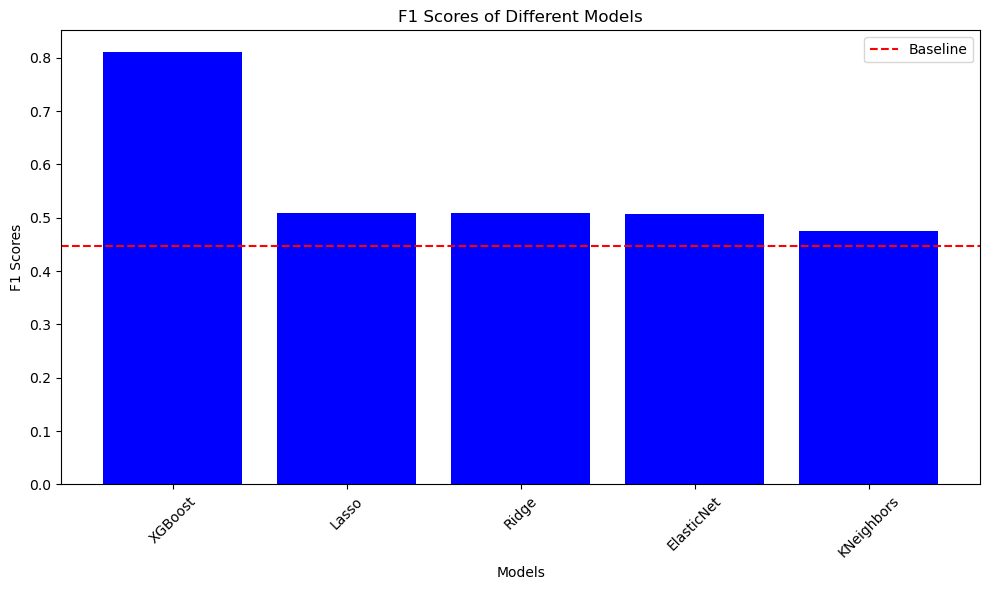

In [42]:


models = ['XGBoost', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighbors', 'Baseline']
f1_scores = [0.8107, 0.5089, 0.5096, 0.5077, 0.4752, 0.4478]
std = [0.0033, 0.2262, 0.2306, 0.2262, 0.2219, 0.0071]

baseline_f1 = f1_scores[-1]

plt.figure(figsize=(10, 6))
plt.bar(models[:-1], f1_scores[:-1], color='blue')  # Plot bars for all models except baseline
plt.axhline(y=baseline_f1, color='red', linestyle='--', label='Baseline')  # Add horizontal red line for baseline

plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('F1 Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()  
plt.tight_layout()

plt.savefig('14.png', bbox_inches='tight', dpi=300)
plt.show()

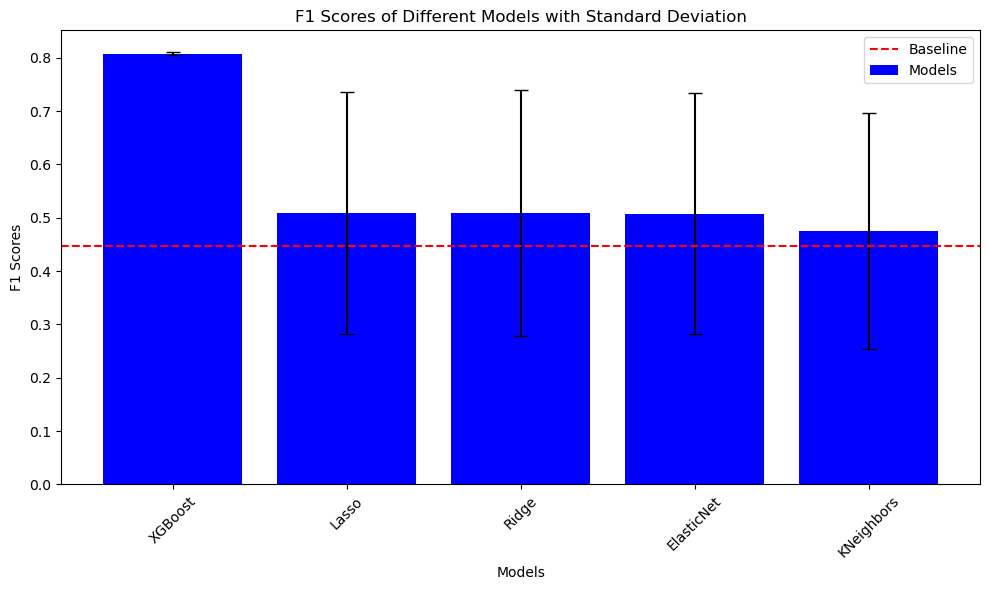

In [43]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost', 'Lasso', 'Ridge', 'ElasticNet', 'KNeighbors', 'Baseline']
f1_scores = [0.8074, 0.5089, 0.5096, 0.5077, 0.4752, 0.4478]
std = [0.0033, 0.2262, 0.2306, 0.2262, 0.2219, 0.0071]

baseline_f1 = f1_scores[-1]

plt.figure(figsize=(10, 6))
plt.bar(models[:-1], f1_scores[:-1], yerr=std[:-1], color='blue', capsize=5, label='Models')  
plt.axhline(y=baseline_f1, color='red', linestyle='--', label='Baseline') 

plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('F1 Scores of Different Models with Standard Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig('15.png', bbox_inches='tight', dpi=300)
plt.show()


Random Baseline Model Results:
Accuracies: [0.4575, 0.4645, 0.445, 0.4465, 0.449]
Mean Accuracy: 0.4525 | STD: 0.0074
Mean Precision: 0.6570 | STD: 0.0132
Mean Recall: 0.3397 | STD: 0.0068
Mean F1-Score: 0.4478 | STD: 0.0071
RMS Errors: [0.7365459931328118, 0.7317786550590281, 0.744983221287567, 0.7439758060582347, 0.7422937423958255]
Mean RMSE: 0.7399 | STD: 0.0050


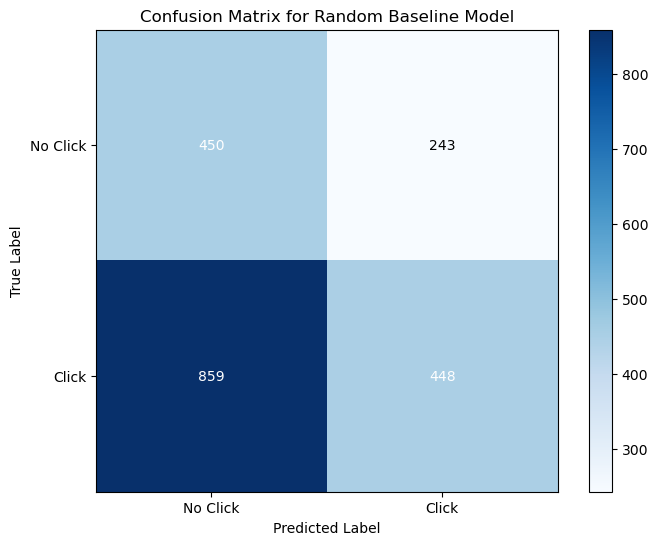

In [53]:
# Baseline Model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

file_path = 'data/ad_click_dataset.csv'  
dataset = pd.read_csv(file_path)

X = dataset.drop(columns=['click', 'id', 'full_name'])  
y = dataset['click']  
groups = dataset['id']

cat_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
num_ftrs = ['age']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)
    ]
)

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

random_loops = [2, 7, 4, 9, 3]

baseline_accuracies = []
baseline_precisions = []
baseline_recalls = []
baseline_f1_scores = []
baseline_rmses = []
confusion_matrices = []

for seed in random_loops:
    np.random.seed(seed)  

    class_probs = y_test.value_counts(normalize=True)
    y_pred_random = np.random.choice([0, 1], size=len(y_test), p=class_probs.values)

    accuracy = accuracy_score(y_test, y_pred_random)
    precision = precision_score(y_test, y_pred_random, zero_division=0)
    recall = recall_score(y_test, y_pred_random, zero_division=0)
    f1 = f1_score(y_test, y_pred_random, zero_division=0)
    rmse = mean_squared_error(y_test, y_pred_random, squared=False)

    baseline_accuracies.append(accuracy)
    baseline_precisions.append(precision)
    baseline_recalls.append(recall)
    baseline_f1_scores.append(f1)
    baseline_rmses.append(rmse)
    confusion_matrices.append(confusion_matrix(y_test, y_pred_random))

mean_accuracy = np.mean(baseline_accuracies)
mean_precision = np.mean(baseline_precisions)
mean_recall = np.mean(baseline_recalls)
mean_f1 = np.mean(baseline_f1_scores)
mean_rmse = np.mean(baseline_rmses)

std_accuracy = np.std(baseline_accuracies)
std_precision = np.std(baseline_precisions)
std_recall = np.std(baseline_recalls)
std_f1 = np.std(baseline_f1_scores)
std_rmse = np.std(baseline_rmses)

print("Random Baseline Model Results:")
print(f"Accuracies: {baseline_accuracies}")
print(f"Mean Accuracy: {mean_accuracy:.4f} | STD: {std_accuracy:.4f}")
print(f"Mean Precision: {mean_precision:.4f} | STD: {std_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f} | STD: {std_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f} | STD: {std_f1:.4f}")
print(f"RMS Errors: {baseline_rmses}")
print(f"Mean RMSE: {mean_rmse:.4f} | STD: {std_rmse:.4f}")

cm_random = confusion_matrices[-1]
plt.figure(figsize=(8, 6))
plt.imshow(cm_random, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix for Random Baseline Model")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Click', 'Click'])
plt.yticks(tick_marks, ['No Click', 'Click'])


for i in range(cm_random.shape[0]):
    for j in range(cm_random.shape[1]):
        plt.text(j, i, f"{cm_random[i, j]}", ha="center", va="center",
                 color="white" if cm_random[i, j] > cm_random.max() / 2 else "black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()